In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## ACP 

In [10]:
df = pd.read_csv('iris.csv', dtype={'Species':'category'}, index_col=0)

In [11]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 6.0 KB


In [13]:
X = df.drop('Species', axis=1)

In [82]:
sc = StandardScaler()
#transformation – centrage-réduction des données X
Z = sc.fit_transform(X)
X_cols = X.columns
Z = pd.DataFrame(Z, columns= X_cols)
acp = PCA(svd_solver='full')
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [104]:
#coord = Y, la matrice des coordonées des individus dans le nouveau plan factoriel
Y = acp.fit_transform(Z)
Y = pd.DataFrame(Y, columns= ['Y'+ str(i) for i in range(Y.shape[1])])

In [70]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


''

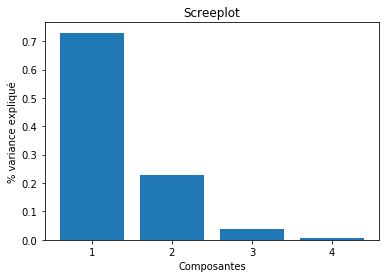

In [71]:
#Screeplot
fig, ax = plt.subplots()
ax.bar(np.arange(1,5,1), acp.explained_variance_ratio_)
ax.set_title('Screeplot')
ax.set_xlabel('Composantes')
ax.set_ylabel('% variance expliqué')
ax.set_xticks(np.arange(1,5,1))  # Set x ticks
;

''

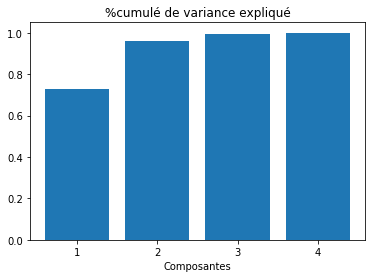

In [72]:
fig, ax = plt.subplots()
ax.bar(np.arange(1,5,1), np.cumsum(acp.explained_variance_ratio_))
ax.set_title('%cumulé de variance expliqué')
ax.set_xlabel('Composantes')
ax.set_xticks(np.arange(1,5,1))  # Set x ticks
;

On garde uniquement les deux premiers facteurs.


**Cercle des correlations**

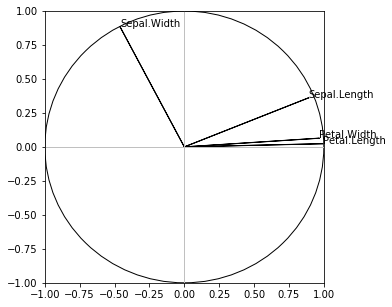

In [137]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))

ax.plot([-1,1],[0,0], color = 'silver', linestyle='-', linewidth=1)
ax.plot([0,0],[-1,1], color = 'silver', linestyle='-', linewidth=1)
circle = plt.Circle((0,0), 1, fill=False)
ax.add_artist(circle)
;

#Obtention des coordonnées de chaque variable de X dans le plan factoriel 
l1 = []; l2=[]
for i in range(len(Z.columns)):
    l1.append(pd.concat([Z.iloc[:,i], Y.iloc[:,0]], axis=1).corr().iloc[0][1])
    l2.append(pd.concat([Z.iloc[:,i], Y.iloc[:,1]], axis=1).corr().iloc[0][1])

#Affichage des variables sur le graph
df_tmp = pd.DataFrame({'id':Z.columns, 'Corr_1':l1, 'Corr_2':l2})
for i in range(len(df_tmp)):
    ax.arrow(0,0, df_tmp.Corr_1[i], df_tmp.Corr_2[i])
    ax.annotate(df_tmp.id[i], (df_tmp.Corr_1[i],df_tmp.Corr_2[i]))



**Affichage des individus**

''

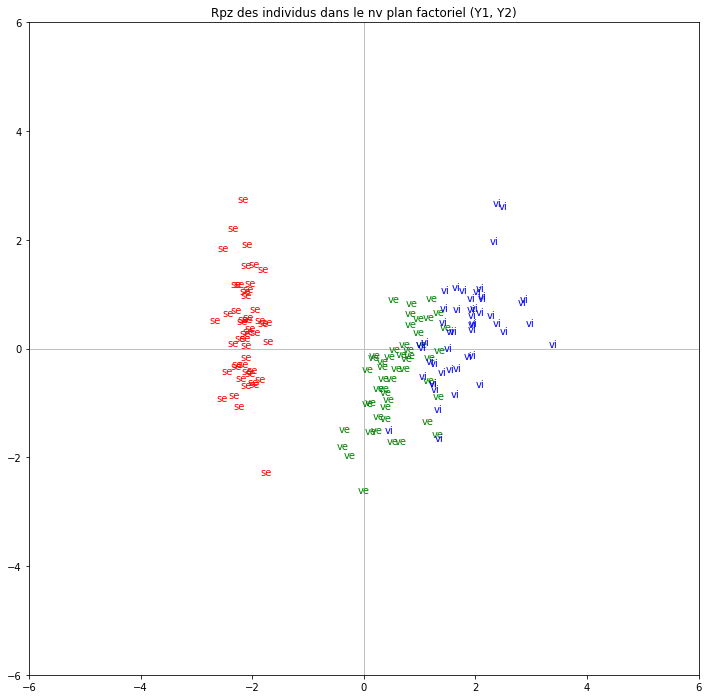

In [136]:
#positionnement des individus dans le premier plan
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) #même limites en abscisse
ax.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
n = len(df)
for i in range(n):
    s = df['Species'].iloc[i]
    s=s[0:2]
    #vi, ve, se
    c='r'
    if s=='vi':c='b'
    if s=='ve':c='g'
    ax.annotate(s,(Y.iloc[i,0],Y.iloc[i,1]), c=c)
#ajouter les axes
ax.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
ax.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
ax.set_title('Rpz des individus dans le nv plan factoriel (Y1, Y2)')
;

Interpretation : 
Nos deux facteurs permettent de discrétiser les 3 espèces différentes. On pourrait presque affirmer qu'elles sont linéairement séparables dans le plan factoriel. 


## CLASS. HIERARCHIQUE
(non supervisée)

On calcul les distances entre les individus. On détermine les 2 individus les plus proches et on remplace alors ces 2 individus par le groupe et on réitère le processus. 

Mais quelle méthode utiliser pour calculer la distance entre 2 groupes ? 

* saut maximum #method = 'complete'
* saut minimum #method = 'single'
* saut moyen #method = 'average'
* distance entre barycentre #method ='centroid' ? 
* distance de ward #method = 'ward'

Quelle distance ? 

* euclidienne
* Hamming (vars. quali)


In [170]:
from scipy.cluster.hierarchy import dendrogram, linkage
import random as rd

In [ ]:
Z = linkage(df.iloc[:, 0:3],method='ward',metric='euclidean')

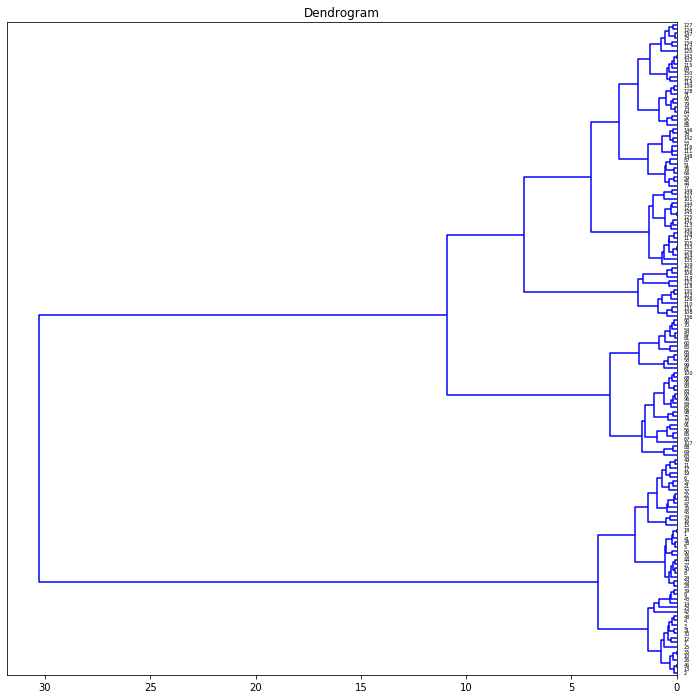

In [166]:
fig, ax = plt.subplots(figsize=(12,12))
dendrogram(Z,labels=df.index,orientation='left',color_threshold=0, ax=ax)
ax.set_title('Dendrogram');

Prenons un échantillons du jeu de données :

In [205]:
idx = np.arange(len(df))
rd.shuffle(idx)
idx_sample = idx[0:20]
df_sample = df.iloc[idx_sample, ]

In [206]:
s = []
for i in range(len(df_sample)):
    s.append(df_sample.iloc[i,-1][0:2] + str(df_sample.index[i]))
df_sample = df_sample.set_index([s])
df_sample = df_sample.drop('Species', axis=1)

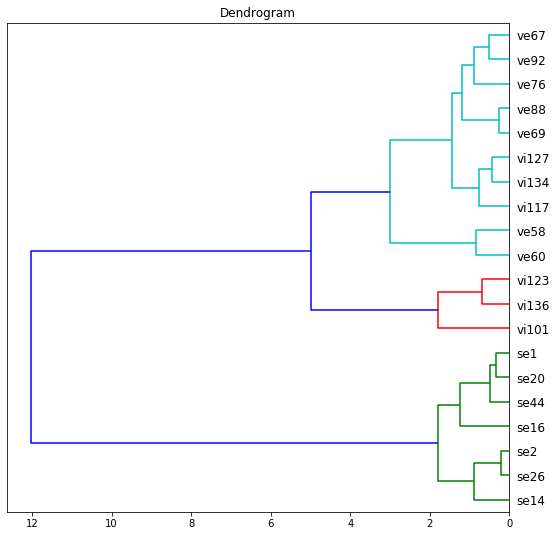

In [214]:
Z = linkage(df_sample,method='ward',metric='euclidean')
fig, ax = plt.subplots(figsize=(9,9))
dendrogram(Z,labels=df_sample.index,orientation='left',color_threshold=3, ax=ax)
ax.set_title('Dendrogram');

Problème au niveau de notre seuil : on a des VE dans le même groupe que des VI

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Plusieurs problèmes : 
* comment tronquer l'arbre de façon optimale ? cf coefficient eta2 (Vinter/Vtotale) = fct(#nombre de groupe)
* quand utiliser la classification hierarchique plutôt qu'une autre méthode ? 